<a href="https://colab.research.google.com/github/LeeSeungwon89/Lecture-and-self-study/blob/master/6-1%20%EA%B5%B0%EC%A7%91%20%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98(%EC%9E%91%EC%97%85%20%EC%A4%91).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집 알고리즘

## 비지도 학습

- 타깃이 없을 때 사용하는 머신러닝 알고리즘.

## 데이터 준비

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
# 코랩에서 '!' 문자로 시작하면 이후 명령을 파이썬 코드가 아니라 리눅스 셸(shell) 명령으로 이해함.
# 'wget' 명령은 원격 주소에서 데이터를 다운로드 하여 저장함.
# '-O' 옵션(숫자 0이 아니라 영어 대문자 O)을 사용하여 저장할 파일 이름을 지정함.
# 이 명령을 실행한 후에 코랩 왼쪽의 파일 탭을 열면 'fruits_300.npy' 가 저장되어 있음.

--2021-07-13 16:14:52--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-07-13 16:14:52--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-07-13 16:14:52--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
# 먼저 3차원 배열과 인덱싱 하는 방법에 대해 설명함
# 아래 배열은 0 ~ 23까지 숫자로 이루어진 3차원 배열임.
# 'reshape(2, 3, 4)' 는 깊이가 2, 행이 3, 열이 4인 3차원 배열로 바꾸는 함수임.
# '[[]]' 로 이루어진 덩어리 2개가 존재함. 이를 깊이라고 부름.
import numpy as np

a = np.arange(24).reshape(2, 3, 4)
print(a)

# 깊이가 1인 배열 전체를 출력함.
# '\n'은 줄바꿈 기능을 가진 이스케이프 문자임. 출력 결과를 보기 좋도록 추가함.
print('\n깊이가 1인 배열 전체\n', a[0]) 
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]]

# 깊이가 2인 배열 전체를 출력함.
print('\n깊이가 2인 배열 전체\n', a[1])
# [[12 13 14 15]
#  [16 17 18 19]
#  [20 21 22 23]]

# 깊이가 1, 행이 1인 배열을 출력함.
print('\n깊이가 1, 행이 1인 배열\n', a[0, 0])
# [0 1 2 3]

# 깊이가 2, 행이 1인 배열을 출력함.
print('\n깊이가 2, 행이 1인 배열\n', a[1, 0])
# [12 13 14 15]

# 깊이가 1, 행이 1, 열이 1인 배열을 출력함.
print('\n깊이가 1, 행이 1, 열이 1인 원소\n', a[0, 0, 0])
# 0

# 깊이가 2, 행이 3, 열이 4인 배열을 출력함.
print('\n깊이가 2, 행이 3, 열이 4인 원소\n', a[1, 2, 3])
# 23

# 깊이가 2, 행이 3, 열이 전체인 배열을 출력함.
# ':' 슬라이싱 연산자를 사용하면 해당 부분의 전체를 선택함.
# 슬라이싱 연산자를 지정하지 않아도 해당 부분의 전체를 선택함.
print('\n깊이가 2, 행이 3, 열이 전체인 배열\n', a[1, 2, :])
print('\n깊이가 2, 행이 3, 열이 전체인 배열(슬라이싱 연산자 생략)\n', a[1, 2])
# [20 21 22 23]

# 깊이가 2, 행이 전체, 열이 1인 배열을 출력함.
print('\n깊이가 2, 행이 전체, 열이 1인 배열\n', a[1, :, 0])
# [12 16 20]

# 깊이가 전체, 행이 전체, 열이 1인 배열을 출력함.
print('\n깊이가 전체, 행이 전체, 열이 1인 배열\n', a[:, :, 0])
# [[ 0  4  8]
#  [12 16 20]]

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]

깊이가 1인 배열 전체
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

깊이가 2인 배열 전체
 [[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]

깊이가 1, 행이 1인 배열
 [0 1 2 3]

깊이가 2, 행이 1인 배열
 [12 13 14 15]

깊이가 1, 행이 1, 열이 1인 원소
 0

깊이가 2, 행이 3, 열이 4인 원소
 23

깊이가 2, 행이 3, 열이 전체인 배열
 [20 21 22 23]

깊이가 2, 행이 3, 열이 전체인 배열(슬라이싱 연산자 생략)
 [20 21 22 23]

깊이가 2, 행이 전체, 열이 1인 배열
 [12 16 20]

깊이가 전체, 행이 전체, 열이 1인 배열
 [[ 0  4  8]
 [12 16 20]]


In [4]:
# 과일 사진 데이터를 읽음.
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
print(fruits, fruits.shape)
# '(300, 100, 100)' 로 이루어진 3차원 배열이며
# 첫 번째 차원(300)은 사과 100개, 바나나 100개, 파인애플 100개로 이루어진 샘플의 총 개수,
# 두 번째 차원(100)은 이미지 높이,
# 세 번째 차원(100)은 이미지 너비,
# 이미지 크기(배열 크기)는 '높이 x 너비' 인 '100 x 100' 이고
# 각 배열의 원소는 픽셀에 대응함.
# 다시 설명하면 '[]' 옆에 다시 '[]' 로 묶인 2차원 배열(샘플)이 300개 존재하며,
# 2차원 배열(샘플) 하나는 행(높이)이 100개, 열(너비)이 100개임.
# 즉 하나의 2차원 배열에 '[]' 로만 묶인 1차원 행(높이)이 100개이며 열(너비)은 100개임.

[[[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 ...

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]] (300, 100, 100)


## 사진 출력하기

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


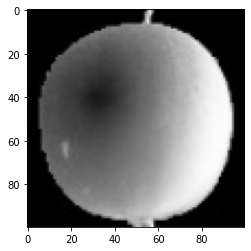

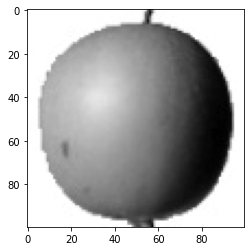

In [5]:
# 첫 번째 샘플(이미지)의 첫 행을 출력함.
# 3차원 배열이므로 처음 인덱스 2개를 0으로 지정하고
# 마지막 인덱스는 지정하지 않거나 슬라이싱 연산자를 쓰면
# 첫 번째 이미지의 첫 번째 행을 모두 선택할 수 있음.
# 첫 번째 행에 있는 픽셀 100개에 든 값을 출력함.
print(fruits[0, 0, :])
# 흑백 사진을 담고 있으므로 0 ~ 255까지의 정숫값을 가짐.

# 첫 번째 샘플(이미지)을 출력함.
print(fruits[0])
# 행 100개, 열 100개로 이루어진 2차원 배열임.

# 'imshow()' 함수로 넘파이 배열로 저장된 이미지를 그림.
# 'cmap' 매개변수를 'gray' 로 설정하여 흑백 이미지로 그림.
plt.imshow(fruits[0], cmap = 'gray')

plt.show()
# 사과 이미지이며, 첫 번째 행이 위에서 출력한 배열 값에 해당함.
# 0에 가까울수록 짙고, 255에 가까울수록 밝음.
# 그러나 일반적으로 흑백 샘플 이미지는 바탕이 밝고 물체가 짙음.
# 컴퓨터가 255에 가까운 밝은 바탕에 집중하지 않도록 바탕을 짙게 만들고 물체를 밝게 하기 위해
# 이미지를 넘파이 배열로 변환할 때 색을 반전시킨 것임.
# 컴퓨터가 255에 가까운 바탕에 집중하는 이유는, 알고리즘은 어떤 출력을 만들기 위해 곱셈과 덧셈을 하는데
# 픽셀값이 0이면 출력도 0이 되어서 무의미하기 때문임.
# 픽셀값이 높으면 출력값도 커지므로 의미를 부여하기 좋음.

# 'imshow()' 함수의 'cmap' 매개변수를 'gray_r' 로 지정하면 색을 다시 반전시킴.
plt.imshow(fruits[0], cmap = 'gray_r')

plt.show()
# 위와 반대로 0에 가까울수록 밝고, 255에 가까울수록 짙음.

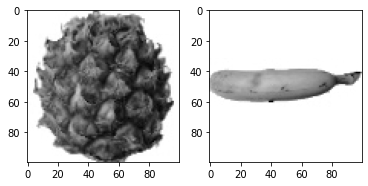

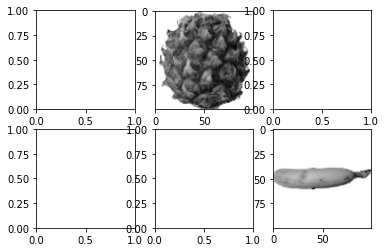

In [6]:
# 바나나와 파인애플 이미지를 출력함.
# 'subplots()' 함수를 사용하여 그래프 여러개를 배열처럼 쌓음.
# 'fig' 는 모양, 'axs' 는 행과 열을 가리킴.
fig, axs = plt.subplots(1, 2) # 1행 2열 지정함.

# 'axs[n]' 은 서브 그래프를 담은 배열이며, 'axs[0]' 에 파인애플 이미지를, 'axs[1]' 에 바나나 이미지를 위치시킴.
axs[0].imshow(fruits[100], cmap = 'gray_r')
axs[1].imshow(fruits[200], cmap = 'gray_r')

plt.show()

# 2행 3열을 지정함.
fig, axs = plt.subplots(2, 3)

axs[0, 1].imshow(fruits[100], cmap = 'gray_r') # 1행 2열에 파인애플 이미지를,
axs[1, 2].imshow(fruits[200], cmap = 'gray_r') # 2행 3열에 바나나 이미지를 위치시킴.

print('\n')
plt.show()

## 픽셀값 분석하기

### 배열의 차원 줄이기

In [7]:
# 사용하기 쉽도록 사과, 파인애플, 바나나로 데이터를 각각 배열로 나눔.
# 100 x 100인 이미지를 펼쳐서 길이가 10,000인 1차원 배열로 만들 예정임.
# 이렇게 1차원 배열로 펼치면 이미지로 출력하긴 어렵지만 배열을 계산할 때 편리함.
# 일단 3차원 배열을 2차원 배열로 만듦.
apple = fruits[0:100].reshape(-1, 100*100) # -1은 샘플 개수인 100이 자동으로 지정되고, 100 x 100은 행 x 열이므로 원소의 총 개수를 의미함.
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

print(apple)
print(apple.shape)
# 100행 10,000열인 2차원 배열이 만들어짐.
# 한 행에 10,000개의 원소(픽셀)가 펼쳐짐.

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
(100, 10000)


### 픽셀 평균값 구하기

In [8]:
# 각 과일의 배열에 들어 있는 샘플의 픽셀 평균값을 넘파이 'mean()' 메서드를 사용하여 계산함.
# 샘플마다 평균값을 계산해야 하므로 축(axis)을 지정해야 함.
# 'axis = 0' 으로 지정하면 첫 번째 축인 가로(행)를 따라 계산함.
# 'axis = 1' 로 지정하면 두 번째 축인 세로(열)를 따라 계산함.
# 여기에서 필요한 것은 샘플의 평균값이므로, 가로로 나열된 값을 계산하는 'axis = 1' 로 지정함.
# 이를 통해 2차원 배열을 1차원 배열로 치환하여 계산을 가능하게 함.
print(apple.mean(axis = 1)) # 'np.mean(apple, axis = 1)' 도 같은 값을 출력함.

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


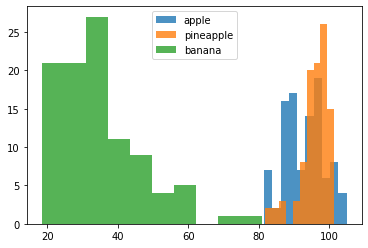

In [9]:
# 'hist()' 함수를 사용하여 히스토그램(Histogram)을 그려서 평균값 분포를 확인함.
# 과일 3종의 히스토그램을 모두 겹쳐서 그림. 조금 투명하게 그려야 겹친 부분을 보기 좋음.
# 'alpha' 매개변수를 1보다 작게 하여 투명도를 지정함.
plt.hist(np.mean(apple, axis = 1), alpha = 0.8)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.8)
plt.hist(np.mean(banana, axis = 1), alpha = 0.8)

# 'legend() 함수를 사용하여 범례를 만듦.
plt.legend(['apple', 'pineapple', 'banana'])

plt.show()
# 바나나는 대체적으로 40 이하에 집중됨. 사진을 차지하는 영역이 작아서 평균값이 작음.
# 사과와 파인애플은 겹치는 부분이 많음. 두 과일 모두 대체로 동그랗고 사진을 차지하는 영역이 비슷하기 때문임.

In [34]:
# 아래 코드로 넘어가기 전에 파이썬 'range()' 함수에 대하여 간략하게 설명함.
# 'range()' 함수 안에 'range(10)' 처럼 숫자를 1개만 지정하면
# 0부터 9(10 - 1)까지 연속된 숫자를 가짐.
# 즉 지정한 숫자를 포함하지 않고 바로 전 숫자까지 연속된 숫자를 가짐.
print('range(10): ', range(10))
# 'range(10)' 은 'range(0, 10)' 과 같으며, 'range(10)' 만 코드로 치면 모든 원소가 출력되지 않음.

# 'range(10)' 을 'list()' 함수로 묶으면 'range(10)' 에 포함된 모든 원소가 리스트로 출력됨.
print('list(range(10)): ', list(range(10)))

# 'range(0, 20, 2)' 처럼 3개의 숫자를 지정하면 'range(start, stop, step)' 을 의미하며,
# 0부터 시작하여 20이 되기 전에 멈추는데, 2보씩 걸어감.
# 즉 0 ~ 19까지 숫자 2를 간격으로 원소를 가짐.
print('list(range(0, 20, 2))): ', list(range(0, 20, 2)))

# 20부터 시작하여 1까지 -2보씩 (뒤로)걸어감.
print('list(range(20, 0, -2))): ', list(range(20, 0, -2)))

# 10부터 시작하여 0까지 -1씩 (뒤로)걸어가도록 'for문' 을 사용함.
# 'for문' 은 반복적으로 뱅뱅 도는 것을 의미하는데,
# 여기서 'for' 가 나타내는 의미는 짐작컨대 '범위' 라고 유추함.
# 반복적으로 특정 범위를 뱅뱅 도는 것임.
for i in range(10, -1, -1) :
    print("객체 'i' 가 지닌 원소는", i)
# 'for i in range(10, -1, -1)' 를 직역하여 쉽게 설명하면
# 'for' 라는 범위 안에 있는 객체 'i' 는 'in(이것 또한 범위)' 으로 특정된 'range(10, -1, -1)' 에 속하는 원소 하나를 받아다가
# 밑으로 내려가서 명령을 수행하고 다시 올라와서 다음 원소를 받아다가
# 다시 밑으로 내려가서 명령을 수행하기를 반복한다고 생각하면 됨. 'in' 으로 특정된 공간의 원소가 고갈될 때까지..
# 이를 다시 정리하면,
# 1. 'in' 으로 지정한 곳에서 원소를 하나씩 꺼내서
# 2. 임의로 명명한 객체인 'i' 에 그 원소를 주고(사실 원소가 적힌 꼬리표를 객체 'i' 에 단다고 생각해야 함.),
# 3. 객체 'i' 가 밑으로 내려가서 그 받은 원소를 가지고 명령을 수행한 후에,
# 4. 다시 올라가서 새로운 원소를 받아다가 밑으로 내려가서 동일한 작업을 반복함.
# 쉽게 설명하고자 원소를 가졌다고 예를 들었을 뿐이며,
# 위 괄호에서 명시했듯이 객체 'i' 에 원소가 적힌 꼬리표를 다는 것임.(객체지향언어)
# 그래서 객체 'i' 는 한 바퀴를 다 돌 때까지 원소로서 활동함.

range(10):  range(0, 10)
list(range(10)):  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
list(range(0, 20, 2))):  [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
list(range(20, 0, -2))):  [20, 18, 16, 14, 12, 10, 8, 6, 4, 2]
객체 'i' 가 지닌 원소는 10
객체 'i' 가 지닌 원소는 9
객체 'i' 가 지닌 원소는 8
객체 'i' 가 지닌 원소는 7
객체 'i' 가 지닌 원소는 6
객체 'i' 가 지닌 원소는 5
객체 'i' 가 지닌 원소는 4
객체 'i' 가 지닌 원소는 3
객체 'i' 가 지닌 원소는 2
객체 'i' 가 지닌 원소는 1
객체 'i' 가 지닌 원소는 0


range(0, 10000)


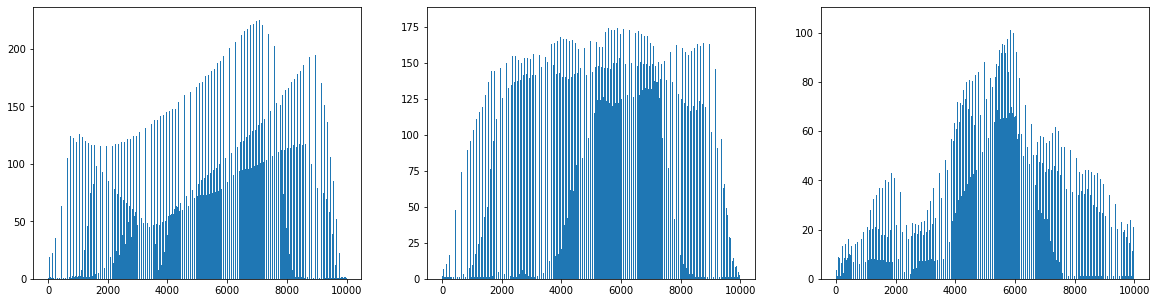

In [12]:
# 각 픽셀 평균을 계산하려면 'axis' 를 0으로 지정하면 됨.
# 맷플롯립의 'bar()' 함수를 사용하여 픽셀 10,000개에 대한 평균값을 막대그래프로 그림.
fig, axs = plt.subplots(1, 3, figsize = (20, 5))

# x축은 'range()' 함수를 사용하여 0 ~ 10000까지 나타내고,
# y축은 'np.mean()' 함수를 사용하여 열 평균을 지정함.
axs[0].bar(range(10000), np.mean(apple, axis = 0))
axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
axs[2].bar(range(10000), np.mean(banana, axis = 0))

plt.show()
# 각 과일은 모양이 다르므로 픽셀값이 높은 위치가 다름.

In [ ]:
작업 중..